In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def plot(time,series,title):
    plt.figure(figsize=(25,20))
    plt.plot(time,series,"-b")
    plt.xlabel("Timestamp",fontsize=20)
    plt.ylabel("Power consumed",fontsize=20)
    plt.xticks(fontsize=15)
    plt.title(title,fontsize=20)

In [3]:
df2=pd.read_csv("Aparments.csv")
df2.head()


,Unnamed: 0,TS,V1,V2,V3,W1,W2,W3,Virtual_Apartment,date_time,day,date,time,power
0,0,1481729400,237.892787,241.452465,239.091898,0.0,0.0,0.0,1,2016-12-14 15:30:00,1,12/14/2016,15:30:00,0.0
1,1,1481733000,239.871393,243.446685,241.501854,0.0,0.0,0.0,1,2016-12-14 16:30:00,1,12/14/2016,16:30:00,0.0
2,2,1481736600,236.130379,239.350839,237.127877,0.0,0.0,0.0,1,2016-12-14 17:30:00,1,12/14/2016,17:30:00,0.0
3,3,1481740200,237.544574,240.841078,238.190673,0.0,0.0,0.0,1,2016-12-14 18:30:00,1,12/14/2016,18:30:00,0.0
4,4,1481743800,238.920708,242.163186,238.454141,0.0,0.0,0.0,1,2016-12-14 19:30:00,1,12/14/2016,19:30:00,0.0


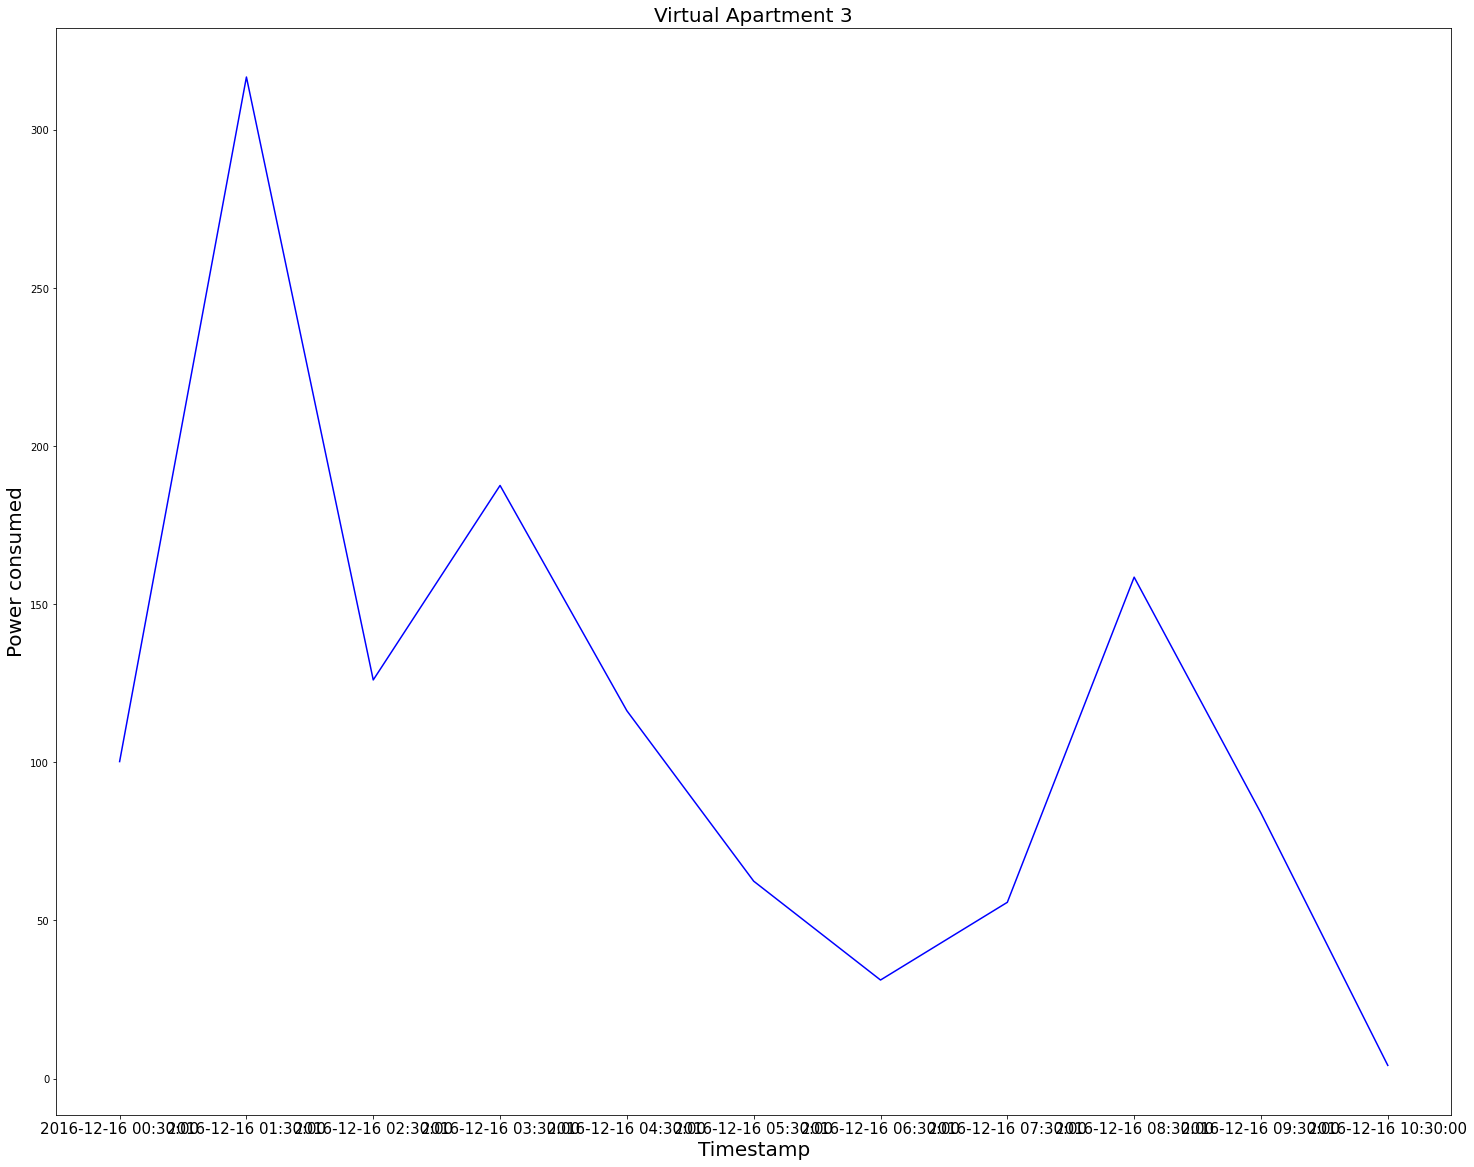

In [4]:
df1=df2.loc[df2["Virtual_Apartment"]==3]
df3=df1.loc[df1["date"]=="12/16/2016"]
time=df3.date_time.values
series=df3.power.values
plot(time,series,"Virtual Apartment 3")

In [5]:
d1=datetime(2016,12,14)
d2=datetime(2017,12,14)
df1=df2.loc[df2["Virtual_Apartment"]==3]
date=[datetime.strptime(i,"%m/%d/%Y") for i in df1.date.values]
power=df1.power.values
date1=[]
power1=[]
for i in range(len(date)):
    if(date[i]>=d1 and date[i]<=d2):
        date1.append(date[i])
        power1.append(power[i])
        
        

  


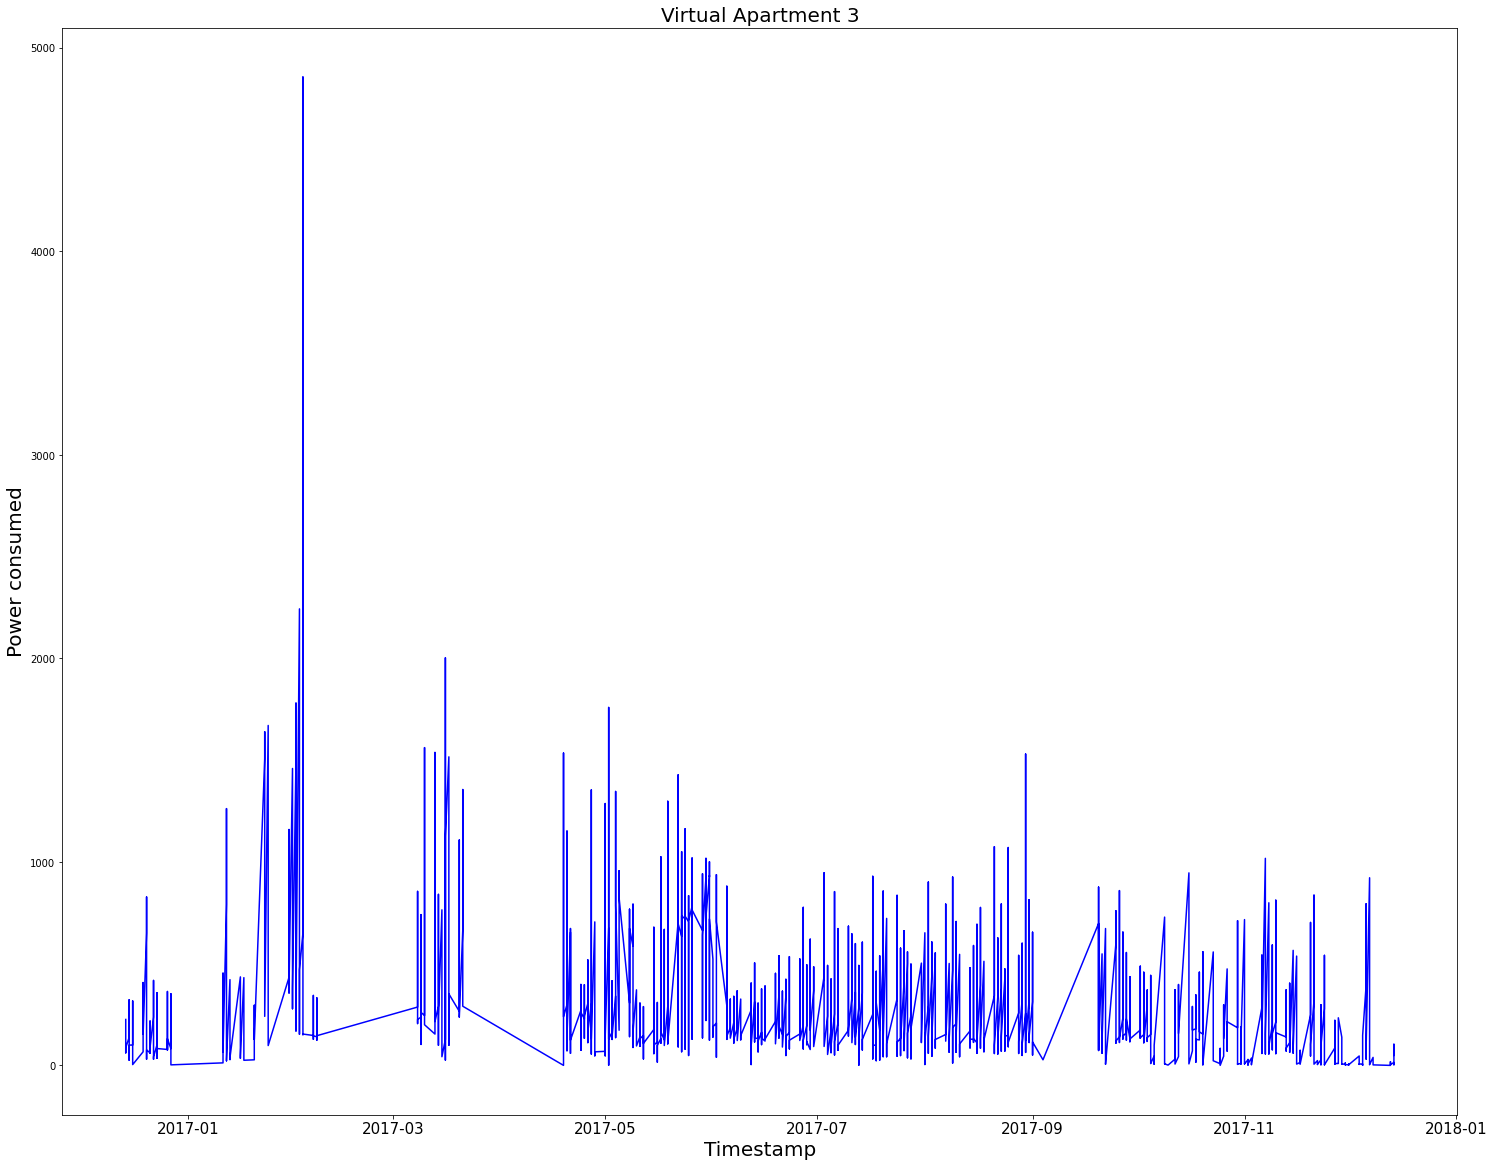

In [6]:
plot(date1,power1,"Virtual Apartment 3")

In [29]:
df1=df2.loc[df2["Virtual_Apartment"]==3]
type(df1.V1.values[0])

numpy.float64

In [8]:
df1.date=pd.get_dummies(prefix='date',data=df1[["date"]],columns=["date"])
df1.time=pd.get_dummies(prefix='time',data=df1[["time"]],columns=["time"])

C:\Users\sudha\anaconda3\envs\conda\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
X=df1[["V1"]]
Y=df1[["power"]]

In [19]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [21]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)


LinearRegression()

In [22]:
y_hat=regr.predict(x_test)
from sklearn.metrics import r2_score
print("%.2f"%np.mean((np.absolute(y_hat-y_test))))
print("%.2f"%np.mean(y_hat-y_test)**2)
print("R2-score: %.2f" % r2_score(y_hat , y_test))
    

134.59
216.28
R2-score: -2.59


In [23]:
y_test

,power
11906,799.305579
10937,132.874112
11396,165.949677
8380,62.136086
11620,220.384560
...,...
12088,8.669408
8341,116.794098
9465,832.946834
11846,14.851617


In [24]:
y_hat

array([[ 174.25375928],
       [ 178.49113693],
       [ 144.95696342],
       [ 374.96736387],
       [ 166.88401304],
       [ 361.35839964],
       [ 139.9385541 ],
       [ 311.70964535],
       [ 219.11009254],
       [ 157.70528957],
       [ 116.74014751],
       [ 254.94201359],
       [ 335.60787383],
       [ 333.01780818],
       [ 419.67857245],
       [ 398.5992979 ],
       [ 126.46491102],
       [ 294.00380404],
       [ 253.73999629],
       [ 101.68395144],
       [ 152.27135924],
       [ 170.99240814],
       [ 207.20131984],
       [ 148.0216319 ],
       [ 227.24143231],
       [ 188.17944177],
       [ 235.87711215],
       [  29.46492414],
       [ 260.46981082],
       [  97.41368784],
       [ 181.71894001],
       [ 146.39774993],
       [ 152.07304867],
       [ 190.37256874],
       [ 276.75742967],
       [ 329.28304014],
       [ 375.85518166],
       [ 258.14547421],
       [ 404.33588971],
       [ 368.77008941],
       [ 272.23184667],
       [ 270.180

In [62]:
X=df1[["V1","V2","V3"]]
Y=df1[["power"]]


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [64]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
print(regr.intercept_,regr.coef_[0])

[-708.07737142] [ 12.25022375 -26.69122469  18.54589821]


In [66]:
y_hat=regr.predict(x_test)
from sklearn.metrics import r2_score
print("%.2f"%np.mean((np.absolute(y_hat-y_test))))
print("%.2f"%np.mean(y_hat-y_test)**2)
print("R2-score: %.2f" % r2_score(y_hat , y_test))
    

143.10
196.93
R2-score: -22.74


In [49]:
y_test

,power
11906,799.305579
10937,132.874112
11396,165.949677
8380,62.136086
11620,220.384560
...,...
12088,8.669408
8341,116.794098
9465,832.946834
11846,14.851617


In [50]:
y_hat

array([[224.17691014],
       [231.62188759],
       [225.72154927],
       [223.04695793],
       [239.21012528],
       [219.66841687],
       [222.58023127],
       [234.60084572],
       [223.71950191],
       [231.04562493],
       [230.43061705],
       [235.4374081 ],
       [241.85771008],
       [236.71046636],
       [218.1304163 ],
       [222.44490184],
       [221.04457978],
       [230.02330929],
       [218.48222417],
       [233.3934471 ],
       [231.57858992],
       [221.29623082],
       [236.62757505],
       [223.1903948 ],
       [240.80371138],
       [236.39595405],
       [218.69643424],
       [220.89841942],
       [224.45818969],
       [228.16832731],
       [225.2262188 ],
       [220.93543083],
       [238.2356653 ],
       [233.22611217],
       [230.22123744],
       [248.3061125 ],
       [226.4283193 ],
       [226.98392276],
       [219.48581711],
       [230.32706412],
       [231.91783844],
       [215.97126059],
       [231.9795825 ],
       [230

In [121]:
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [122]:
np.random.seed(0)

In [167]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 1000)

In [143]:
d1=datetime(2016,12,14)
d2=datetime(2017,12,14)
data=[]
for i in range(1,40,1):
    data1=[]
    try:
        df1=df2.loc[df2["Virtual_Apartment"]==i]
        df3=df1.loc[df1["date"]=="12/14/2017"]
        n=len(df3.power.values)
        sum1=df3.power.sum()
        avg=sum1/n
        data1.append(i)
        data1.append(avg)
        data.append(data1)
    except:
        continue

<ipython-input-143-a8f52f1e7abf>:11: RuntimeWarning: invalid value encountered in double_scalars
  avg=sum1/n
<ipython-input-143-a8f52f1e7abf>:11: RuntimeWarning: invalid value encountered in double_scalars
  avg=sum1/n


In [144]:
df4=pd.DataFrame(data,columns=["Virtual_Apartment","Average_Power"])
df4.head()

,Virtual_Apartment,Average_Power
0,1,0.000000
1,2,0.029912
2,3,34.984057
3,4,72.080002
4,5,36.554693


In [157]:
df4[["Average_Power"]]=df4[["Average_Power"]].fillna(0)

In [168]:
X=df4[["Average_Power"]].values
k_means.fit(X)

KMeans(n_clusters=4, n_init=1000)

In [169]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[105.04844273],
       [311.16529868],
       [562.62981852],
       [ 29.42290266]])

In [170]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3,
       3, 3, 3, 1, 0, 3, 1, 3, 3, 2, 2, 0, 1, 2, 0, 0, 3])

[105.04844273] [False False False  True False False  True  True False  True  True False
 False False False  True  True  True  True False False False False False
 False False  True False False False False False False  True False False
  True  True False]
[311.16529868] [False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False  True False False  True False False False False False  True False
 False False False]
[562.62981852] [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False  True
 False False False]
[29.42290266] [ True  True  True False  True  True False False  True False False False
  True  True  True False False False False  True False  True  True  True
  True False False  True False  True  True False False False False False
 Fals

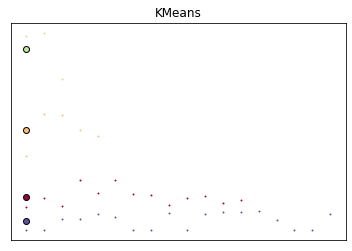

In [171]:

fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(4), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    print(cluster_center,my_members)
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [190]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [191]:
epsilon = 10
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0,  0,  1,  2,  1,  3,  2,  2,  1,  4,  2, -1,  0,  0,  3,  4,  2,
        2,  2,  0,  5,  3,  3,  3,  3,  5,  2,  1, -1,  0,  0,  6,  6,  2,
       -1, -1,  2,  2,  3], dtype=int64)

In [192]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [193]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

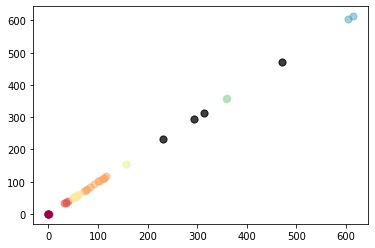

In [195]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 0],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 0],s=50, c=[col], marker=u'o', alpha=0.5)